In [1]:
from keras.datasets import fashion_mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

2022-12-07 16:42:17.409684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train.reshape(x_train.shape[0],-1))
X_test_scaled = scaler.fit_transform(x_test.reshape(x_test.shape[0],-1))

X_train_subset = X_train_scaled[:2000]
y_train_subset = y_train[:2000]

sklearn_pca = PCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X_train_subset)

svm = SVC(C=2)
svm.fit(X_train_subset, y_train_subset)

SVC(C=2)

Training accuracy:  0.9545
Testing accuracy:  0.8264


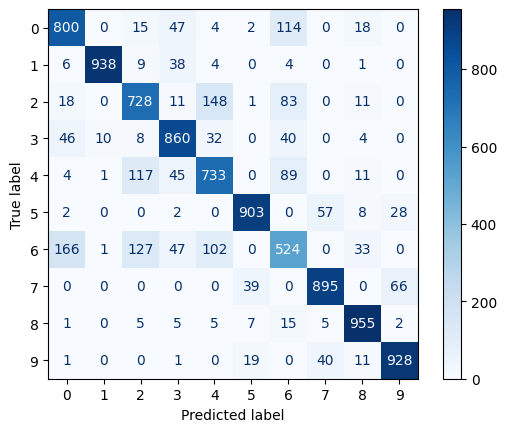

In [31]:
print('Training accuracy: ', round(svm.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(svm.score(X_test_scaled, y_test.flatten()),4))

plot_confusion_matrix(svm, X_test_scaled, y_test.flatten(), cmap="Blues")

In [4]:
def plot_validation_curve(svc_kernel, X, y, param_name, param_range, name):
#     param_range = np.logspace(-6, -1, 5)
    train_scores, test_scores = validation_curve(
        svc_kernel,
        X,
        y,
        param_name=param_name,
        param_range=param_range,
        scoring="accuracy",
        n_jobs=-1,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.subplots(1, figsize=(7,7))
    plt.plot(param_range, train_scores_mean, label="Training Scores", color="blue")
    plt.plot(param_range, test_scores_mean, label="Cross-Validation Scores", color="green") 
    
    plt.fill_between(param_range, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color='lightskyblue')
    plt.fill_between(param_range, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color='lightgreen')    
    
    plt.title(f"{name}")
    plt.xlabel(f"{param_name}")
    plt.ylabel("Score")
    plt.legend()
    plt.show()
    

# RBF kernel

### Validation Curves

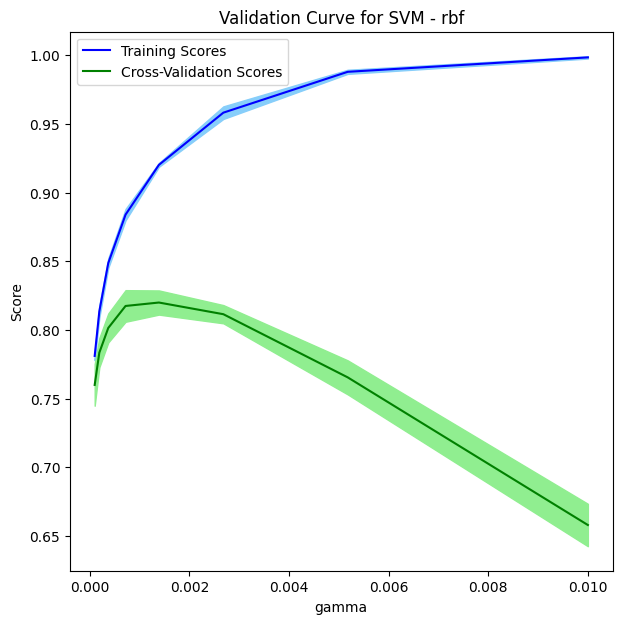

In [5]:
plot_validation_curve(svm, X_train_subset, y_train_subset, "gamma", np.logspace(-2,-4,8), "Validation Curve for SVM - rbf")

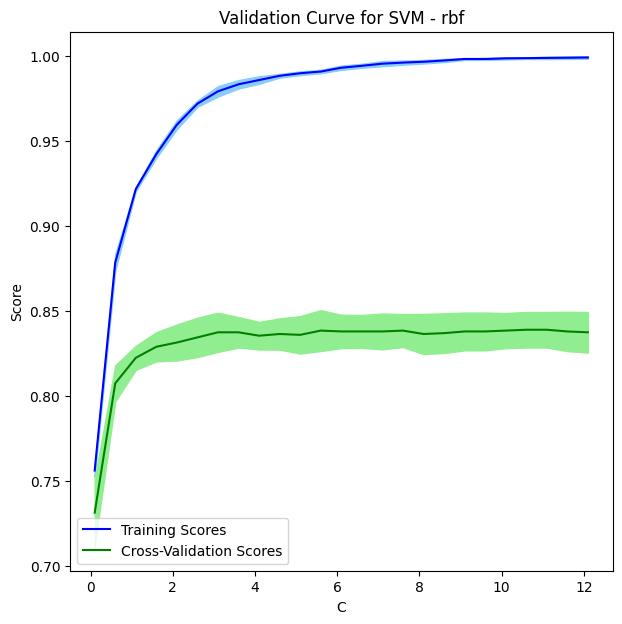

In [6]:
plot_validation_curve(svm, X_train_subset, y_train_subset, "C", np.arange(0.1,12.2,0.5).tolist(), "Validation Curve for SVM - rbf")

### Hyperparamter Tuning

In [7]:
gammas = np.logspace(-2,-4,8)
Cs = np.arange(0.1,12.2,0.5).tolist()
parameters = {'C':Cs, 'gamma':gammas}

svm_rbf = SVC()
gridcv_rbf = GridSearchCV(svm_rbf, parameters, scoring='accuracy', cv=3, return_train_score=True, n_jobs=-1, verbose=2)
gridcv_rbf.fit(X_train_subset, y_train_subset)
gridcv_rbf.best_params_


Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'C': 5.1, 'gamma': 0.0013894954943731374}

[CV] END ..................C=0.1, gamma=0.005179474679231213; total time=   9.3s
[CV] END ................C=0.1, gamma=0.00019306977288832496; total time=   5.1s
[CV] END ..................C=0.6, gamma=0.002682695795279727; total time=   3.2s
[CV] END ................................C=0.6, gamma=0.0001; total time=   3.1s
[CV] END .................C=1.1, gamma=0.0013894954943731374; total time=   2.6s
[CV] END ................C=1.1, gamma=0.00019306977288832496; total time=   2.9s
[CV] END ..................C=1.6, gamma=0.002682695795279727; total time=   4.2s
[CV] END ................C=1.6, gamma=0.00037275937203149417; total time=   2.3s
[CV] END ..................C=2.1, gamma=0.005179474679231213; total time=   6.1s
[CV] END ................C=2.1, gamma=0.00019306977288832496; total time=   1.8s
[CV] END ..................C=2.6, gamma=0.002682695795279727; total time=   4.8s
[CV] END ................C=2.6, gamma=0.00037275937203149417; total time=   1.9s
[CV] END ..................C

[CV] END ..................................C=0.1, gamma=0.01; total time=   9.5s
[CV] END ................................C=0.1, gamma=0.0001; total time=   5.3s
[CV] END .................C=0.6, gamma=0.0013894954943731374; total time=   2.8s
[CV] END ................C=0.6, gamma=0.00019306977288832496; total time=   2.8s
[CV] END ..................C=1.1, gamma=0.002682695795279727; total time=   3.4s
[CV] END ................................C=1.1, gamma=0.0001; total time=   3.0s
[CV] END .................C=1.6, gamma=0.0013894954943731374; total time=   3.3s
[CV] END ................C=1.6, gamma=0.00037275937203149417; total time=   2.2s
[CV] END ..................C=2.1, gamma=0.005179474679231213; total time=   6.2s
[CV] END ................C=2.1, gamma=0.00019306977288832496; total time=   1.8s
[CV] END ..................C=2.6, gamma=0.002682695795279727; total time=   4.9s
[CV] END ................C=2.6, gamma=0.00037275937203149417; total time=   1.8s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.002682695795279727; total time=   8.7s
[CV] END ................C=0.1, gamma=0.00037275937203149417; total time=   4.7s
[CV] END ..................C=0.6, gamma=0.005179474679231213; total time=   3.2s
[CV] END ................C=0.6, gamma=0.00037275937203149417; total time=   2.1s
[CV] END ..................C=1.1, gamma=0.005179474679231213; total time=   4.1s
[CV] END ................C=1.1, gamma=0.00019306977288832496; total time=   2.9s
[CV] END ..................C=1.6, gamma=0.002682695795279727; total time=   4.1s
[CV] END ................C=1.6, gamma=0.00019306977288832496; total time=   2.3s
[CV] END ..................C=2.1, gamma=0.002682695795279727; total time=   5.3s
[CV] END ................C=2.1, gamma=0.00037275937203149417; total time=   1.6s
[CV] END ..................................C=2.6, gamma=0.01; total time=   6.3s
[CV] END ................................C=2.6, gamma=0.0001; total time=   2.0s
[CV] END .................C=

[CV] END ..................................C=0.1, gamma=0.01; total time=   9.5s
[CV] END ................................C=0.1, gamma=0.0001; total time=   5.3s
[CV] END .................C=0.6, gamma=0.0013894954943731374; total time=   2.8s
[CV] END ................C=0.6, gamma=0.00019306977288832496; total time=   2.8s
[CV] END ..................C=1.1, gamma=0.002682695795279727; total time=   3.4s
[CV] END ................................C=1.1, gamma=0.0001; total time=   3.0s
[CV] END .................C=1.6, gamma=0.0013894954943731374; total time=   3.3s
[CV] END ................C=1.6, gamma=0.00037275937203149417; total time=   2.1s
[CV] END ..................................C=2.1, gamma=0.01; total time=   6.8s
[CV] END ................................C=2.1, gamma=0.0001; total time=   2.0s
[CV] END .................C=2.6, gamma=0.0013894954943731374; total time=   3.6s
[CV] END .................C=2.6, gamma=0.0007196856730011522; total time=   1.9s
[CV] END ..................C

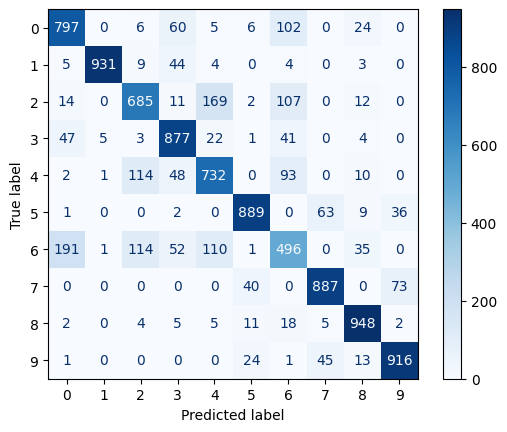

In [8]:
svm_rbf_tuned = SVC(C=5.1, gamma=0.00138949549, kernel='rbf')
svm_rbf_tuned.fit(X_train_scaled, y_train)

print('Training accuracy: ', round(svm_rbf_tuned.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(svm_rbf_tuned.score(X_test_scaled, y_test.flatten()),4))

plot_confusion_matrix(svm, X_test_scaled, y_test.flatten(), cmap="Blues")

# Linear Kernel  

In [9]:
svm_linear = SVC(C = 2.0, kernel = "linear")
svm_linear.fit(X_train_subset, y_train_subset)

SVC(C=2.0, kernel='linear')

In [32]:
print('Training accuracy: ', round(svm_linear.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(svm_linear.score(X_test_scaled, y_test.flatten()),4))

Training accuracy:  1.0
Testing accuracy:  0.7943


### Validation Curves

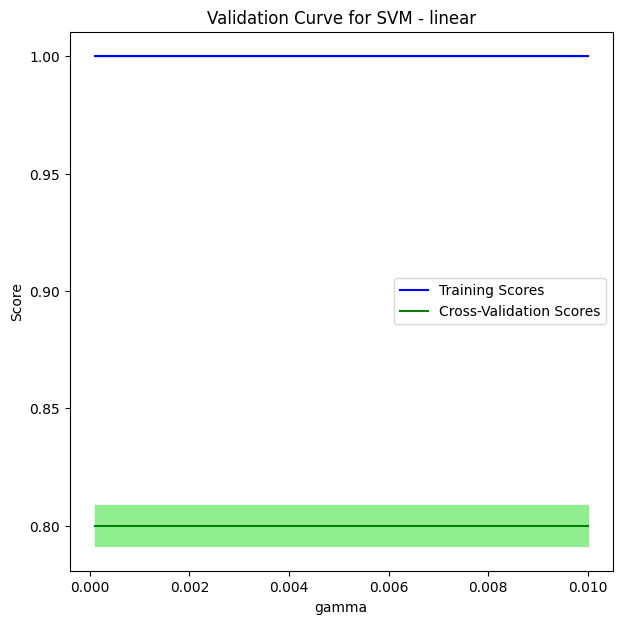

In [10]:
plot_validation_curve(svm_linear, X_train_subset, y_train_subset, "gamma", np.logspace(-2,-4,8), "Validation Curve for SVM - linear")

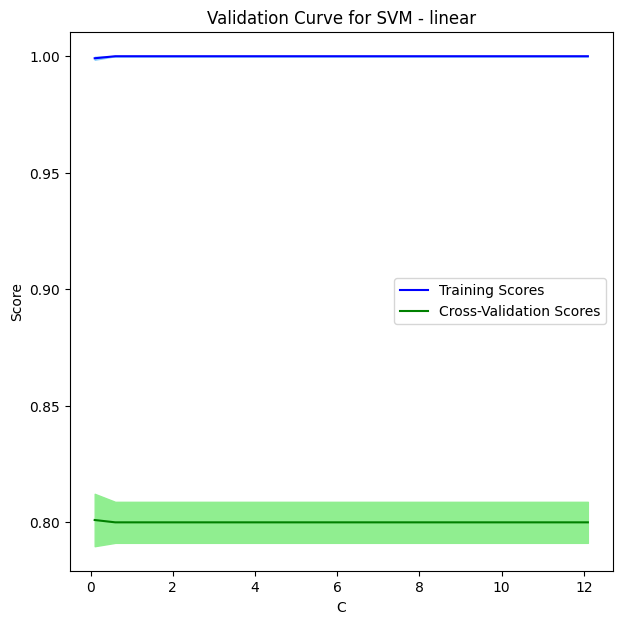

In [11]:
plot_validation_curve(svm_linear, X_train_subset, y_train_subset, "C", np.arange(0.1,12.2,0.5).tolist(), "Validation Curve for SVM - linear")

In [21]:
gammas = np.logspace(-2,-4,8)
Cs = np.arange(0.1,12.2,0.5).tolist()
parameters = {'C':Cs, 'gamma':gammas}

svm_linear = SVC(kernel="linear")
gridcv_linear = GridSearchCV(svm_linear, parameters, scoring='accuracy', cv=3, return_train_score=True, n_jobs=-1, verbose=2)
gridcv_linear.fit(X_train_subset, y_train_subset)
gridcv_linear.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'C': 0.1, 'gamma': 0.01}

In [41]:
linear_poly_tuned = SVC(kernel="linear", C=0.1, gamma=0.01)
linear_poly_tuned.fit(X_train_subset, y_train_subset)

print('Training accuracy: ', round(linear_poly_tuned.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(linear_poly_tuned.score(X_test_scaled, y_test.flatten()),4))

Training accuracy:  0.9955
Testing accuracy:  0.7965
[CV] END ..................C=0.1, gamma=0.005179474679231213; total time=   6.5s
[CV] END ................C=0.1, gamma=0.00037275937203149417; total time=  14.8s
[CV] END ..................C=0.6, gamma=0.005179474679231213; total time=   5.9s
[CV] END ................C=0.6, gamma=0.00037275937203149417; total time=  14.0s
[CV] END ..................C=1.1, gamma=0.005179474679231213; total time=   5.7s
[CV] END ................C=1.1, gamma=0.00037275937203149417; total time=  11.4s
[CV] END ..................C=1.6, gamma=0.005179474679231213; total time=   5.2s
[CV] END ................C=1.6, gamma=0.00037275937203149417; total time=  12.3s
[CV] END ..................C=2.1, gamma=0.005179474679231213; total time=   5.8s
[CV] END ................C=2.1, gamma=0.00037275937203149417; total time=  12.1s
[CV] END ..................C=2.6, gamma=0.005179474679231213; total time=   5.1s
[CV] END ................C=2.6, gamma=0.0003727593720314

[CV] END ..................C=0.1, gamma=0.005179474679231213; total time=   6.2s
[CV] END .................C=0.1, gamma=0.0007196856730011522; total time=  14.3s
[CV] END ..................................C=0.6, gamma=0.01; total time=   6.0s
[CV] END .................C=0.6, gamma=0.0007196856730011522; total time=  11.1s
[CV] END ..................................C=1.1, gamma=0.01; total time=   6.1s
[CV] END .................C=1.1, gamma=0.0013894954943731374; total time=   5.8s
[CV] END ................................C=1.1, gamma=0.0001; total time=  12.4s
[CV] END .................C=1.6, gamma=0.0007196856730011522; total time=   8.2s
[CV] END ..................................C=2.1, gamma=0.01; total time=   6.4s
[CV] END ..................C=2.1, gamma=0.002682695795279727; total time=   6.1s
[CV] END ................C=2.1, gamma=0.00019306977288832496; total time=  14.9s
[CV] END .................C=2.6, gamma=0.0013894954943731374; total time=   6.3s
[CV] END ...................

[CV] END ..................................C=0.1, gamma=0.01; total time=   5.9s
[CV] END .................C=0.1, gamma=0.0007196856730011522; total time=  14.2s
[CV] END ..................................C=0.6, gamma=0.01; total time=   5.5s
[CV] END .................C=0.6, gamma=0.0007196856730011522; total time=  10.5s
[CV] END ..................................C=1.1, gamma=0.01; total time=   6.0s
[CV] END .................C=1.1, gamma=0.0013894954943731374; total time=   6.4s
[CV] END ................................C=1.1, gamma=0.0001; total time=  13.2s
[CV] END .................C=1.6, gamma=0.0007196856730011522; total time=   7.9s
[CV] END ..................................C=2.1, gamma=0.01; total time=   6.3s
[CV] END ..................C=2.1, gamma=0.002682695795279727; total time=   5.8s
[CV] END ................C=2.1, gamma=0.00019306977288832496; total time=  14.2s
[CV] END .................C=2.6, gamma=0.0013894954943731374; total time=   5.5s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.002682695795279727; total time=   7.6s
[CV] END ................C=0.1, gamma=0.00019306977288832496; total time=  15.0s
[CV] END ..................C=0.6, gamma=0.002682695795279727; total time=   6.3s
[CV] END ................C=0.6, gamma=0.00019306977288832496; total time=  14.8s
[CV] END ..................C=1.1, gamma=0.002682695795279727; total time=   5.7s
[CV] END ................C=1.1, gamma=0.00019306977288832496; total time=  12.4s
[CV] END .................C=1.6, gamma=0.0013894954943731374; total time=   5.9s
[CV] END ................................C=1.6, gamma=0.0001; total time=  14.3s
[CV] END .................C=2.1, gamma=0.0007196856730011522; total time=   8.1s
[CV] END ..................................C=2.6, gamma=0.01; total time=   6.7s
[CV] END ..................C=2.6, gamma=0.002682695795279727; total time=   5.3s
[CV] END ................C=2.6, gamma=0.00037275937203149417; total time=  12.1s
[CV] END ..................C

# Poly Kernel

In [22]:
svm_poly = SVC(C = 2.0, kernel = "poly")
svm_poly.fit(X_train_subset, y_train_subset)

SVC(C=2.0, kernel='poly')

In [33]:
print('Training accuracy: ', round(svm_poly.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(svm_poly.score(X_test_scaled, y_test.flatten()),4))

Training accuracy:  0.9125
Testing accuracy:  0.7736


### Validation Curves

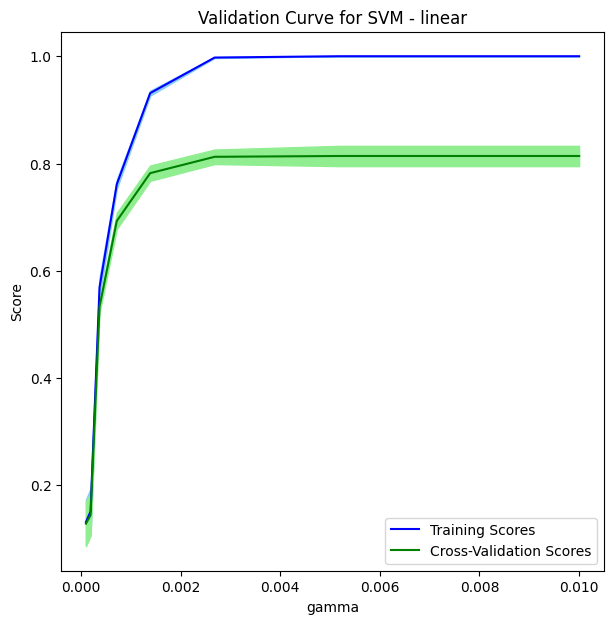

In [23]:
plot_validation_curve(svm_poly, X_train_subset, y_train_subset, "gamma", np.logspace(-2,-4,8), "Validation Curve for SVM - linear")

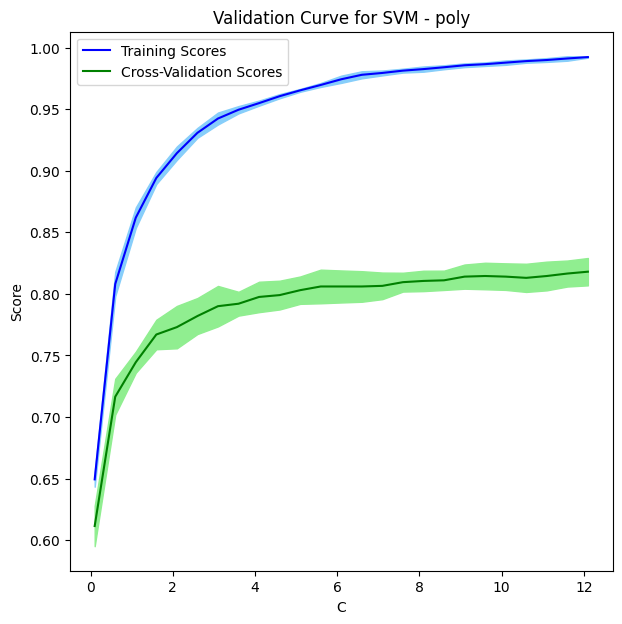

In [24]:
plot_validation_curve(svm_poly, X_train_subset, y_train_subset, "C", np.arange(0.1,12.2,0.5).tolist(), "Validation Curve for SVM - poly")

In [40]:
gammas = np.logspace(-2,-4,8)
Cs = np.arange(0.1,12.2,0.5).tolist()
parameters = {'C':Cs, 'gamma':gammas}

svm_poly = SVC(kernel="poly")
gridcv_poly = GridSearchCV(svm_poly, parameters, scoring='accuracy', cv=3, return_train_score=True, n_jobs=-1, verbose=2)
gridcv_poly.fit(X_train_subset, y_train_subset)
gridcv_poly.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'C': 3.1, 'gamma': 0.002682695795279727}

In [38]:
svm_poly_tuned = SVC(kernel="poly", C=3.1, gamma=0.002682696)
svm_poly_tuned.fit(X_train_subset, y_train_subset)

print('Training accuracy: ', round(svm_poly_tuned.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(svm_poly_tuned.score(X_test_scaled, y_test.flatten()),4))

Training accuracy:  1.0
Testing accuracy:  0.8162


# Sigmoid Kernel

In [26]:
svm_sigmoid = SVC(C = 2.0, kernel = "sigmoid")
svm_sigmoid.fit(X_train_subset, y_train_subset)

SVC(C=2.0, kernel='sigmoid')

In [34]:
print('Training accuracy: ', round(svm_sigmoid.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(svm_sigmoid.score(X_test_scaled, y_test.flatten()),4))

Training accuracy:  0.7975
Testing accuracy:  0.7555


### Validation Curves

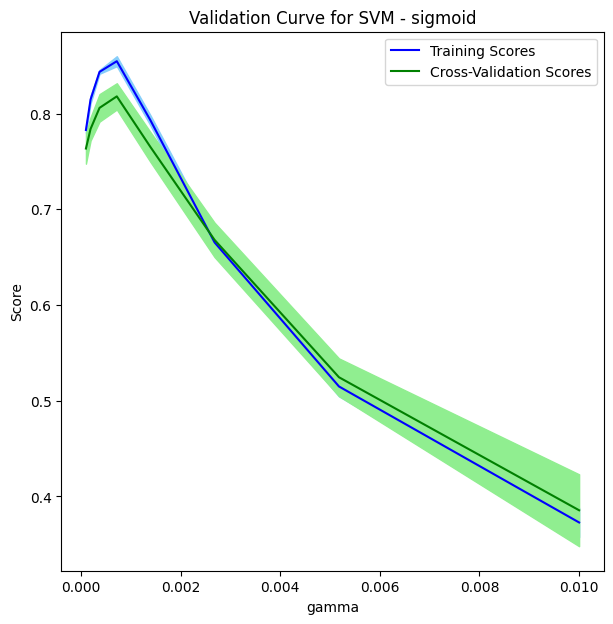

In [27]:
plot_validation_curve(svm_sigmoid, X_train_subset, y_train_subset, "gamma", np.logspace(-2,-4,8), "Validation Curve for SVM - sigmoid")

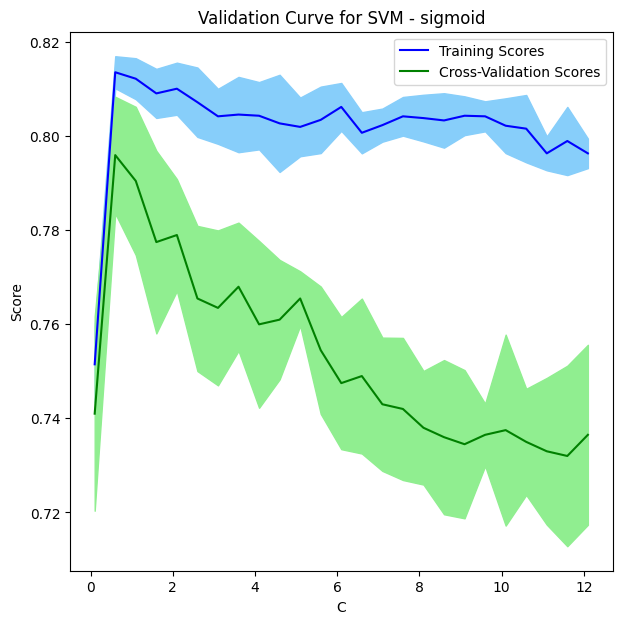

In [28]:
plot_validation_curve(svm_sigmoid, X_train_subset, y_train_subset, "C", np.arange(0.1,12.2,0.5).tolist(), "Validation Curve for SVM - sigmoid")

In [29]:
gammas = np.logspace(-2,-4,8)
Cs = np.arange(0.1,12.2,0.5).tolist()
parameters = {'C':Cs, 'gamma':gammas}

svm_sigmoid = SVC(kernel="sigmoid")
gridcv_sigmoid = GridSearchCV(svm_sigmoid, parameters, scoring='accuracy', cv=3, return_train_score=True, n_jobs=-1, verbose=2)
gridcv_sigmoid.fit(X_train_subset, y_train_subset)
gridcv_sigmoid.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


{'C': 12.1, 'gamma': 0.00037275937203149417}

[CV] END ..................C=0.1, gamma=0.002682695795279727; total time=   5.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   4.8s
[CV] END ..................C=0.6, gamma=0.002682695795279727; total time=   4.5s
[CV] END ................C=0.6, gamma=0.00037275937203149417; total time=   3.6s
[CV] END ..................C=1.1, gamma=0.005179474679231213; total time=   4.0s
[CV] END .................C=1.1, gamma=0.0007196856730011522; total time=   3.6s
[CV] END ..................C=1.6, gamma=0.002682695795279727; total time=   3.8s
[CV] END ................C=1.6, gamma=0.00037275937203149417; total time=   3.0s
[CV] END ..................C=2.1, gamma=0.005179474679231213; total time=   3.7s
[CV] END .................C=2.1, gamma=0.0007196856730011522; total time=   3.7s
[CV] END ..................C=2.6, gamma=0.005179474679231213; total time=   3.5s
[CV] END ................C=2.6, gamma=0.00037275937203149417; total time=   3.0s
[CV] END ..................C

[CV] END .................C=2.1, gamma=0.0007196856730011522; total time=   6.3s
[CV] END ..................................C=2.6, gamma=0.01; total time=   5.2s
[CV] END ..................C=2.6, gamma=0.005179474679231213; total time=   4.6s
[CV] END ................C=2.6, gamma=0.00037275937203149417; total time=   9.4s
[CV] END ..................C=3.1, gamma=0.005179474679231213; total time=   4.6s
[CV] END ................C=3.1, gamma=0.00037275937203149417; total time=   9.1s
[CV] END ..................C=3.6, gamma=0.005179474679231213; total time=   4.5s
[CV] END ................C=3.6, gamma=0.00037275937203149417; total time=   8.8s
[CV] END ..................C=4.1, gamma=0.005179474679231213; total time=   4.6s
[CV] END ................C=4.1, gamma=0.00037275937203149417; total time=   8.4s
[CV] END ..................C=4.6, gamma=0.005179474679231213; total time=   4.8s
[CV] END ................C=4.6, gamma=0.00019306977288832496; total time=  10.4s
[CV] END .................C=

[CV] END .................C=0.1, gamma=0.0013894954943731374; total time=   5.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   5.0s
[CV] END .................C=0.6, gamma=0.0013894954943731374; total time=   4.5s
[CV] END ................................C=0.6, gamma=0.0001; total time=   4.1s
[CV] END .................C=1.1, gamma=0.0013894954943731374; total time=   4.0s
[CV] END ................................C=1.1, gamma=0.0001; total time=   3.8s
[CV] END .................C=1.6, gamma=0.0013894954943731374; total time=   3.9s
[CV] END ................................C=1.6, gamma=0.0001; total time=   3.3s
[CV] END .................C=2.1, gamma=0.0013894954943731374; total time=   4.4s
[CV] END ................................C=2.1, gamma=0.0001; total time=   3.8s
[CV] END .................C=2.6, gamma=0.0013894954943731374; total time=   3.6s
[CV] END ................................C=2.6, gamma=0.0001; total time=   3.4s
[CV] END .................C=

[CV] END ..................C=0.1, gamma=0.005179474679231213; total time=   4.8s
[CV] END ................C=0.1, gamma=0.00019306977288832496; total time=   4.9s
[CV] END ..................C=0.6, gamma=0.005179474679231213; total time=   4.4s
[CV] END ................C=0.6, gamma=0.00037275937203149417; total time=   3.5s
[CV] END ..................................C=1.1, gamma=0.01; total time=   4.1s
[CV] END ................C=1.1, gamma=0.00037275937203149417; total time=   3.4s
[CV] END ..................C=1.6, gamma=0.005179474679231213; total time=   3.9s
[CV] END .................C=1.6, gamma=0.0007196856730011522; total time=   3.1s
[CV] END ..................C=2.1, gamma=0.005179474679231213; total time=   4.3s
[CV] END ................C=2.1, gamma=0.00019306977288832496; total time=   3.8s
[CV] END .................C=2.6, gamma=0.0013894954943731374; total time=   3.5s
[CV] END ................................C=2.6, gamma=0.0001; total time=   3.3s
[CV] END ..................C

[CV] END ..................................C=0.1, gamma=0.01; total time=   4.7s
[CV] END ................C=0.1, gamma=0.00037275937203149417; total time=   5.0s
[CV] END ..................................C=0.6, gamma=0.01; total time=   4.4s
[CV] END .................C=0.6, gamma=0.0007196856730011522; total time=   3.3s
[CV] END ..................................C=1.1, gamma=0.01; total time=   3.7s
[CV] END .................C=1.1, gamma=0.0007196856730011522; total time=   3.4s
[CV] END ..................................C=1.6, gamma=0.01; total time=   4.0s
[CV] END .................C=1.6, gamma=0.0007196856730011522; total time=   2.6s
[CV] END ..................................C=2.1, gamma=0.01; total time=   2.8s
[CV] END .................C=2.1, gamma=0.0007196856730011522; total time=   3.9s
[CV] END ..................................C=2.6, gamma=0.01; total time=   3.0s
[CV] END .................C=2.6, gamma=0.0007196856730011522; total time=   3.1s
[CV] END ...................

[CV] END ..................................C=0.1, gamma=0.01; total time=   4.9s
[CV] END ................................C=0.1, gamma=0.0001; total time=   4.9s
[CV] END ..................C=0.6, gamma=0.002682695795279727; total time=   4.5s
[CV] END ................................C=0.6, gamma=0.0001; total time=   3.8s
[CV] END ..................C=1.1, gamma=0.002682695795279727; total time=   4.1s
[CV] END ................................C=1.1, gamma=0.0001; total time=   3.6s
[CV] END ..................C=1.6, gamma=0.002682695795279727; total time=   4.1s
[CV] END ................................C=1.6, gamma=0.0001; total time=   3.1s
[CV] END ..................C=2.1, gamma=0.002682695795279727; total time=   4.2s
[CV] END ................................C=2.1, gamma=0.0001; total time=   3.7s
[CV] END ..................C=2.6, gamma=0.002682695795279727; total time=   3.7s
[CV] END ................................C=2.6, gamma=0.0001; total time=   3.4s
[CV] END .................C=

[CV] END .................C=0.1, gamma=0.0013894954943731374; total time=   4.8s
[CV] END ................C=0.1, gamma=0.00037275937203149417; total time=   5.1s
[CV] END .................C=0.6, gamma=0.0013894954943731374; total time=   4.4s
[CV] END ................C=0.6, gamma=0.00019306977288832496; total time=   3.7s
[CV] END ..................C=1.1, gamma=0.005179474679231213; total time=   4.1s
[CV] END ................C=1.1, gamma=0.00019306977288832496; total time=   3.6s
[CV] END .................C=1.6, gamma=0.0013894954943731374; total time=   3.9s
[CV] END ................C=1.6, gamma=0.00019306977288832496; total time=   3.3s
[CV] END .................C=2.1, gamma=0.0013894954943731374; total time=   4.2s
[CV] END ................C=2.1, gamma=0.00019306977288832496; total time=   3.7s
[CV] END ..................C=2.6, gamma=0.002682695795279727; total time=   3.5s
[CV] END ................C=2.6, gamma=0.00019306977288832496; total time=   3.3s
[CV] END ..................C

[CV] END ..................C=0.1, gamma=0.002682695795279727; total time=   4.7s
[CV] END .................C=0.1, gamma=0.0007196856730011522; total time=   5.1s
[CV] END ..................C=0.6, gamma=0.002682695795279727; total time=   4.5s
[CV] END ................C=0.6, gamma=0.00037275937203149417; total time=   3.8s
[CV] END .................C=1.1, gamma=0.0013894954943731374; total time=   4.0s
[CV] END ................C=1.1, gamma=0.00019306977288832496; total time=   3.6s
[CV] END ..................C=1.6, gamma=0.005179474679231213; total time=   3.8s
[CV] END ................C=1.6, gamma=0.00037275937203149417; total time=   2.9s
[CV] END ..................................C=2.1, gamma=0.01; total time=   4.0s
[CV] END ................C=2.1, gamma=0.00037275937203149417; total time=   3.6s
[CV] END ..................C=2.6, gamma=0.005179474679231213; total time=   3.4s
[CV] END .................C=2.6, gamma=0.0007196856730011522; total time=   3.1s
[CV] END ..................C

In [35]:
svm_rbf_tuned = SVC(kernel="sigmoid", C=12.1, gamma=0.000372759)
svm_rbf_tuned.fit(X_train_subset, y_train_subset)

print('Training accuracy: ', round(svm_rbf_tuned.score(X_train_subset, y_train_subset.flatten()),4))
print('Testing accuracy: ', round(svm_rbf_tuned.score(X_test_scaled, y_test.flatten()),4))

Training accuracy:  0.9125
Testing accuracy:  0.8118


# Decesion Boundary

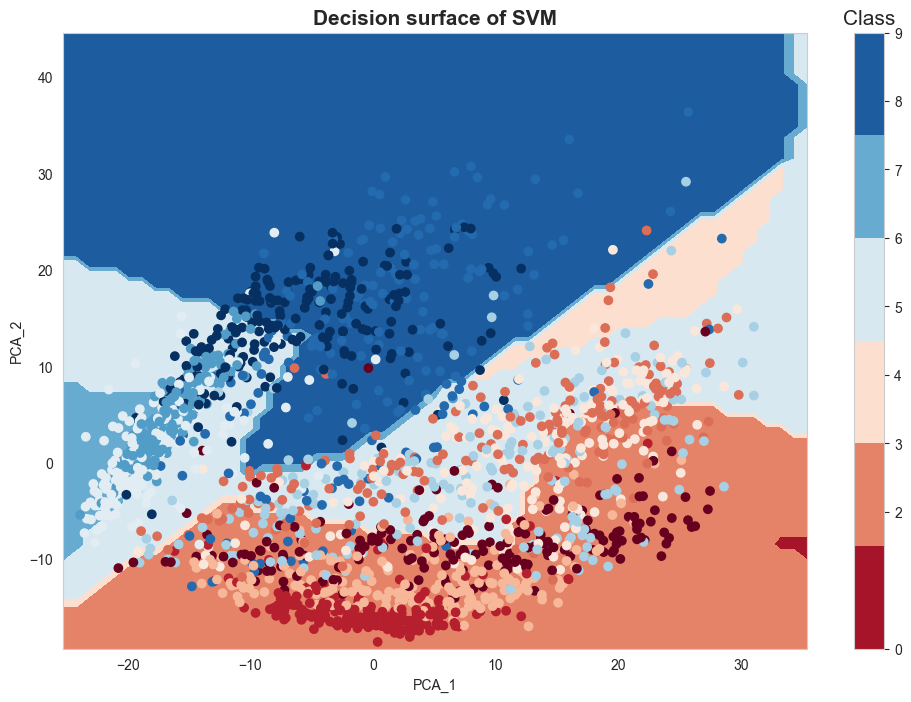

In [47]:
# Decision boundaries

# Dimension reduction for plotting
sklearn_pca = PCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X_train_scaled)
pca_comps = sklearn_pca.components_

std_x = np.std(X_pca[0])
std_y = np.std(X_pca[0])

# create meshgrid - labcode
x_min, x_max = X_pca[:, 0].min() - .5, X_pca[:, 0].max() + .5
y_min, y_max = X_pca[:, 1].min() - .5, X_pca[:, 1].max() + .5
x_step = std_x/10
y_step = std_y/10

xx, yy = np.meshgrid(np.arange(x_min, x_max, x_step), np.arange(y_min, y_max, y_step))

# Projected points into PC plane
z = np.c_[xx.ravel(), yy.ravel()]

# Revert projection
x = np.dot(z,pca_comps)

predictions = svm_rbf_tuned.predict(x)
predictions = predictions.reshape(xx.shape)

# Plot decision boundaries
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
contour = plt.contourf(xx, yy, predictions, cmap=plt.cm.RdBu)
clb = plt.colorbar(contour, boundaries=list(np.unique(predictions)),ticks=list(np.unique(predictions)),spacing='proportional')
clb.ax.set_title('Class', fontsize=15)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Decision surface of SVM", fontweight = 'bold', fontsize=15)

X_pca_subset = X_pca[:2000]
y_pca_subset = y_train[:2000]
plt.scatter(X_pca_subset[:, 0], X_pca_subset[:, 1], c=y_pca_subset, cmap=plt.cm.RdBu)


In [48]:
np.logspace(-2,-4,8)


array([0.01      , 0.00517947, 0.0026827 , 0.0013895 , 0.00071969,
       0.00037276, 0.00019307, 0.0001    ])